In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
##stock market analysis project to display some of the basics of Python programming in financial markets.
##Determining which of the 3 below specified stocks would yield the highest return for a $1 invested 


In [2]:
# Install yfinance package.
!pip install yfinance
 
# Import yfinance
import yfinance as yf  
 
# Get the data for the stock Apple by specifying the stock ticker, start date, and end date
tesla = yf.download('TSLA','2017-01-01','2020-02-28')
ford = yf.download('FORD','2017-01-01','2020-02-28')
gm = yf.download('GM','2017-01-01','2020-02-28')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47233500
2020-02-04,882.960022,968.989990,833.880005,887.059998,887.059998,60775600


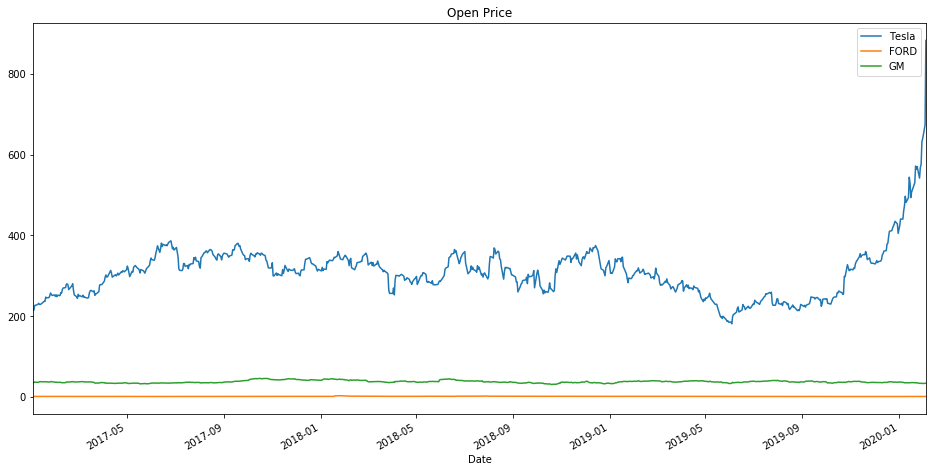

In [4]:
##Plot based on opening prices
tesla['Open'].plot(label='Tesla', figsize=(16,8), title='Open Price')
ford['Open'].plot(label='FORD')
gm['Open'].plot(label='GM')
plt.legend();

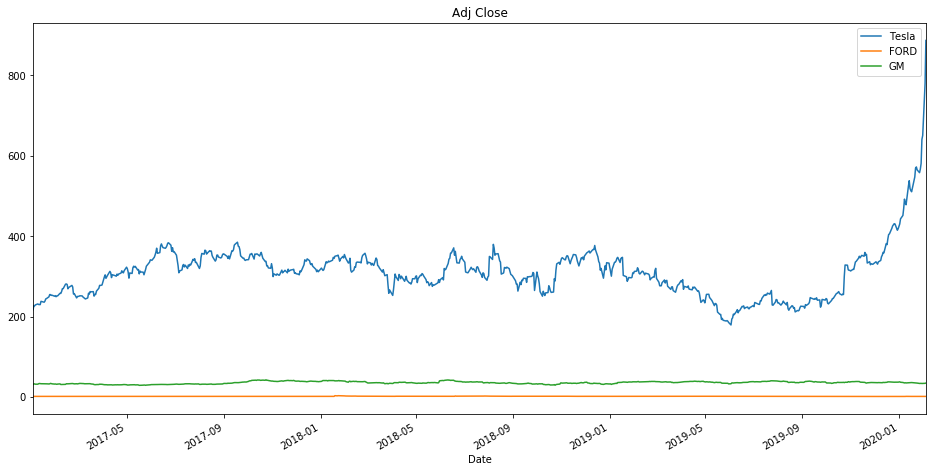

In [5]:
##Plot based on Adjusted Closing prices
tesla['Adj Close'].plot(label='Tesla', figsize=(16,8), title='Adj Close')
ford['Adj Close'].plot(label='FORD')
gm['Adj Close'].plot(label='GM')
plt.legend();

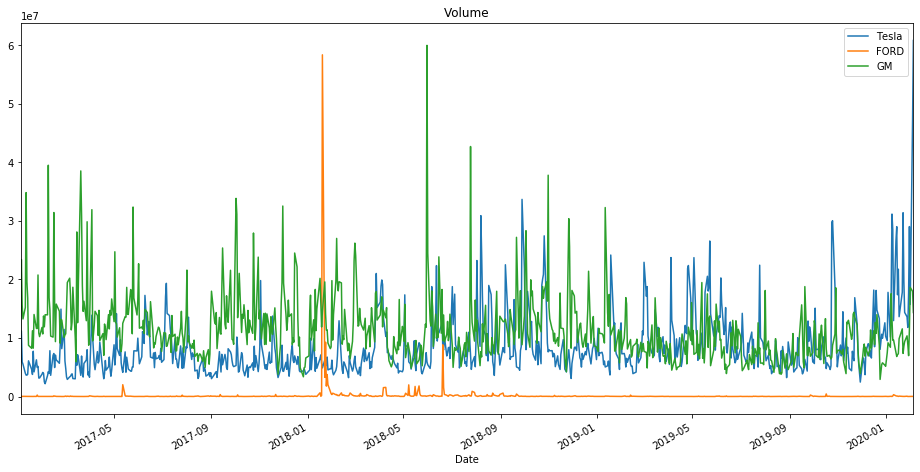

In [6]:
##Plot the volume of stocks traded each day 
tesla['Volume'].plot(label='Tesla', figsize=(16,8), title='Volume')
ford['Volume'].plot(label='FORD')
gm['Volume'].plot(label='GM')
plt.legend();

In [7]:
##What are the dates for which the stocks traded the most?
tesla['Volume'].idxmax()
gm['Volume'].idxmax()
ford['Volume'].idxmax()

Timestamp('2018-01-19 00:00:00')

The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. 
Representation of Market Cap = Volume * Open price. (e.g. 100 units of stock at $10 would equate to a $100000 market cap.

In [8]:
##Dollars traded for the day 
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

Text(0, 0.5, 'Total Traded')

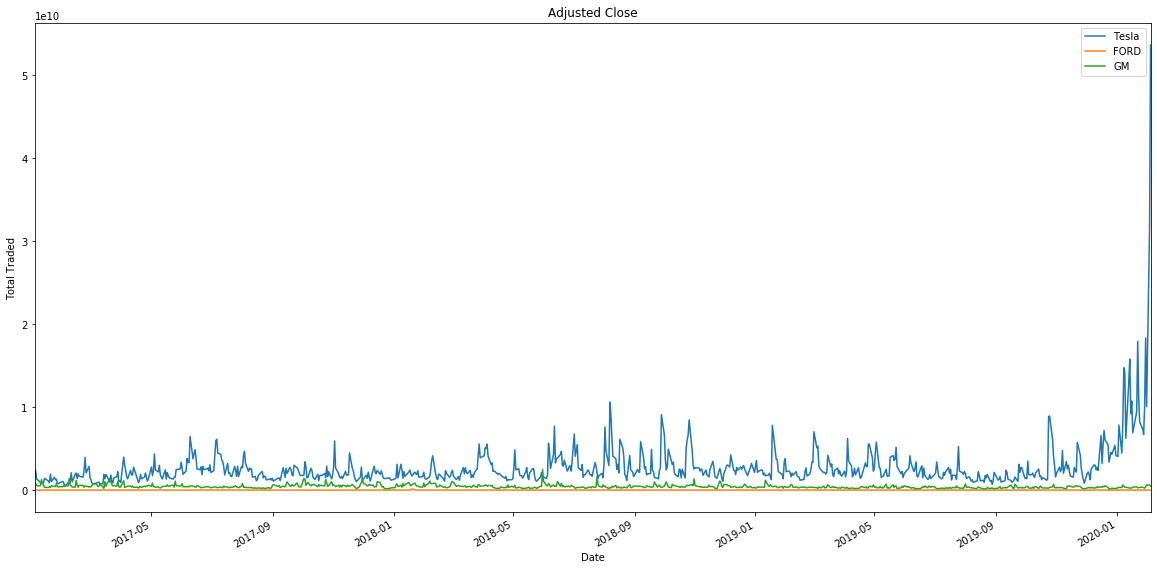

In [9]:
##Plot based on Adjusted Closing prices
tesla['Total Traded'].plot(label='Tesla', figsize=(20,10), title='Adjusted Close')
ford['Total Traded'].plot(label='FORD')
gm['Total Traded'].plot(label='GM')
plt.legend();
plt.ylabel('Total Traded')

In [10]:
tesla['Total Traded'].idxmax(axis = 0)

Timestamp('2020-02-04 00:00:00')

In [11]:
tesla['Total Traded'].nlargest(12)

Date
2020-02-04    5.366243e+10
2020-02-03    3.182074e+10
2020-01-30    1.834378e+10
2020-01-22    1.793962e+10
2020-01-14    1.578147e+10
2020-01-08    1.475306e+10
2020-01-09    1.413772e+10
2020-01-13    1.308644e+10
2020-01-23    1.108808e+10
2020-01-16    1.073250e+10
2018-08-07    1.061633e+10
2020-01-29    1.024815e+10
Name: Total Traded, dtype: float64

Plot out moving averages

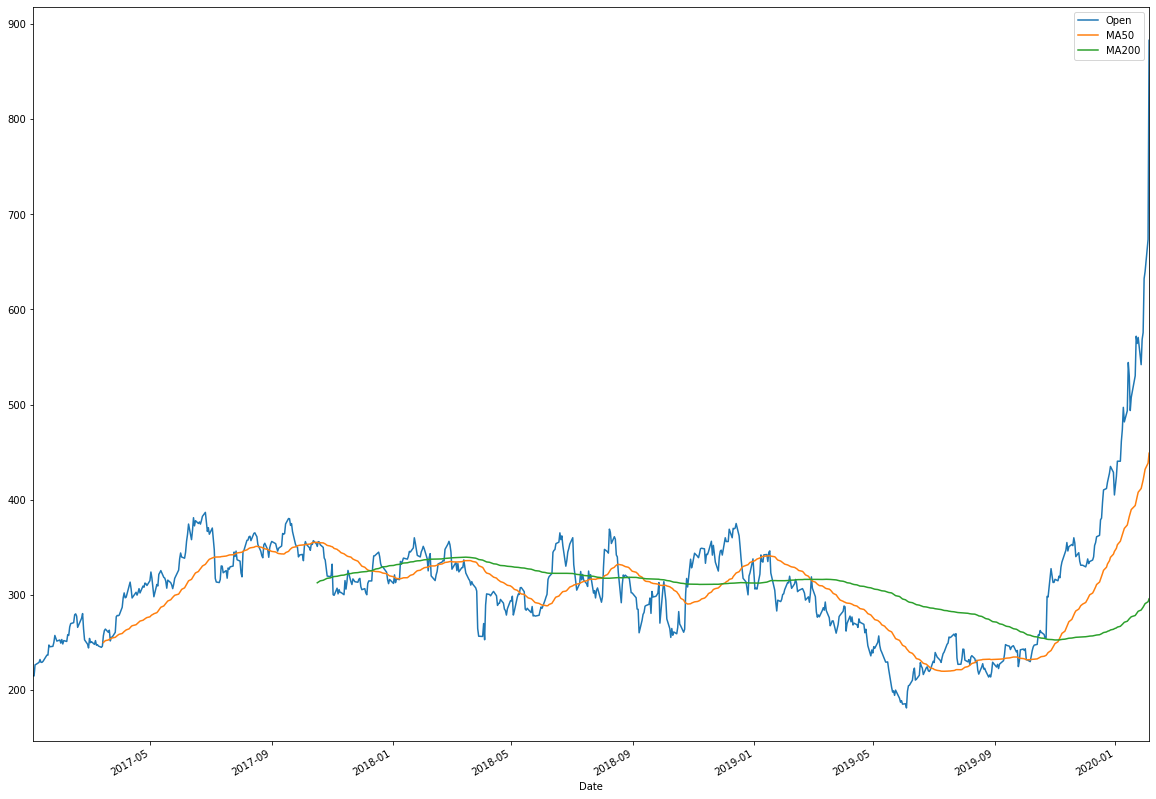

In [12]:
##Plotting moving average of TSLA
tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla['MA200'] = tesla['Open'].rolling(200).mean()
tesla[['Open', 'MA50', 'MA200']].plot(label='TSLA', figsize=(20,15));

Calculating Daily returns 

In [13]:
tesla['returns'] = tesla['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [23]:
tesla.tail()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,1.024815e+10,420.639000,287.082451,0.024854,2.677497
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,1.834378e+10,426.274600,288.901401,0.102962,2.953177
2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,1.006035e+10,432.016199,290.772651,0.015231,2.998157
2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47233500,3.182074e+10,438.454999,292.767351,0.198949,3.594636
2020-02-04,882.960022,968.989990,833.880005,887.059998,887.059998,60775600,5.366243e+10,448.914200,295.826001,0.137256,4.088022


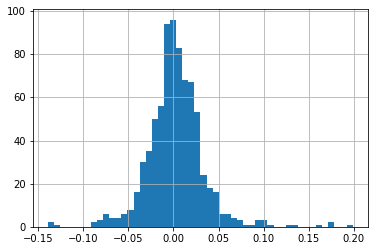

In [15]:
tesla['returns'].hist(bins=50)

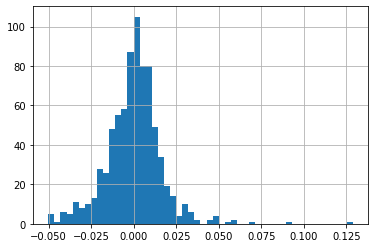

In [16]:
gm['returns'].hist(bins=50)

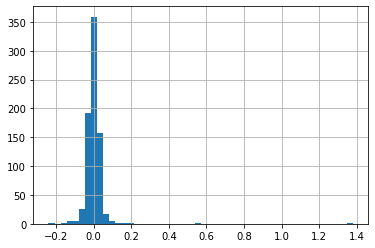

In [17]:
ford['returns'].hist(bins=50)

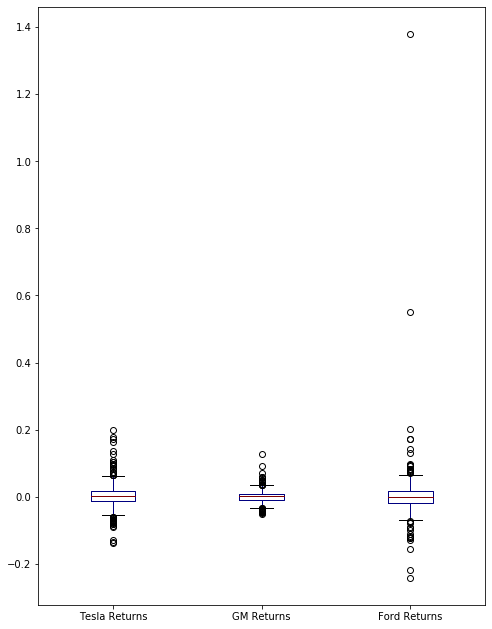

In [18]:
##box plot comparing the returns
box_df = pd.concat([tesla['returns'],gm['returns'], ford['returns']],axis = 1)
box_df.columns = ['Tesla Returns', 'GM Returns', 'Ford Returns']
box_df.plot(kind='box', figsize=(8,11), colormap='jet') ; 

In [19]:
ford['Total Traded'].nlargest(12)

Date
2018-01-19    1.516434e+08
2018-01-23    2.223768e+07
2018-06-20    1.270915e+07
2018-01-25    1.090255e+07
2018-01-22    8.699685e+06
2018-01-26    6.057600e+06
2018-01-24    5.213056e+06
2018-06-21    3.075000e+06
2018-05-21    3.073940e+06
2018-05-08    2.964951e+06
2018-05-16    2.641086e+06
2018-04-09    2.436096e+06
Name: Total Traded, dtype: float64

Daily Return: Daily return is the profit/loss made by the stock compared to the previous day.
Cumulative Return: Cumulative return is computed relative to the day investment is made. If the cumulative return is above one, you are making profits else you are in loss.
df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()

In [20]:
#create cumulative return column for each car comapany's dataframe
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

In [24]:
tesla.tail()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,1.024815e+10,420.639000,287.082451,0.024854,2.677497
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,1.834378e+10,426.274600,288.901401,0.102962,2.953177
2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,1.006035e+10,432.016199,290.772651,0.015231,2.998157
2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47233500,3.182074e+10,438.454999,292.767351,0.198949,3.594636
2020-02-04,882.960022,968.989990,833.880005,887.059998,887.059998,60775600,5.366243e+10,448.914200,295.826001,0.137256,4.088022


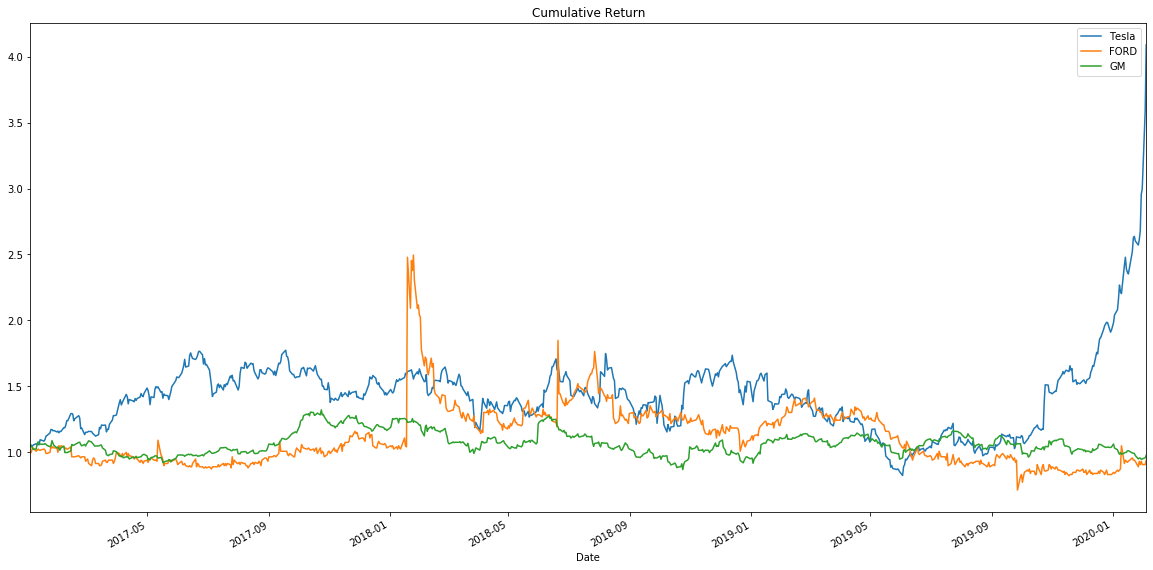

In [22]:
##Cumulative return columns against the time series index. Which stock showed the highest return for a $1 invested?
#Which showed the lowest ? 
tesla['Cumulative Return'].plot(label='Tesla', figsize=(20,10), title='Cumulative Return')
ford['Cumulative Return'].plot(label='FORD')
gm['Cumulative Return'].plot(label='GM')
plt.legend();
